<a href="https://colab.research.google.com/github/juninhoisrael/Finances/blob/main/Agrupamento_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introdução ao mercado de ações

O que isso significa dizer que uma empresa está listada na Bolsa de valores?

 - Em algum momento fica difícil uma empresa crescer mais "sozinha" e ela abre sua sociedade para novos investidores
   - Isso quer dizer que ela se divide em vários "pedacinhos"(ações) e qualquer pessoa disposta possa comprar esse pedacinho e se tornar sócio da empresa
   - Essa compra gera um capital na empresa, que então pode investir como quiser
   - Esses micro sócios podem, inclusive, participar de algumas decisões em alguns casos.
   
 - Entretanto, esses proprietários podem, a qualquer momento, **vender os pedacinhos adquiridos para outras pessoas**.
   - O mercado de ações se trata dessas compras e vendas de pedacinhos das empresas listadas.
   
#### Por que o preço varia tanto?

 O preço está relacionado a quanto alguém está disposto a pagar por elas. 
   


## Mas por que uma ação oscila?

Há diversas motivos:

 - Alguma notícia no setor;
 - Variação do preço de algum insumo;
 - Expectativas diferentes no futuro daquela empresa ou setor;
 - Desastres naturais como  terremoto ou epidemia;

 Por exemplo a epidemia do coronavirus, gerou impactos na indústria do petróleo. por causa das quarentenas mundo a fora, não havia consumo então as pessoas ficaram receosas e venderam ações por preços menores para não ter prejuizo. Por outro lado as grandes empresas farmaceuticas que produziram vacinas gerou otimismo e se valorizaram.
 
#### Será que conseguimos <u>agrupar</u> ações que tendem a oscilar de forma semelhante, logo devem ter <u>motivos semelhantes</u>?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Flai/Finance/b3_stocks_1994_2020.csv")
df

,datetime,ticker,open,close,high,low,volume
0,1994-07-04,ACE 3,48.00,48.00,48.00,47.00,46550.00
1,1994-07-04,ALP 3,155.27,156.00,156.00,155.27,163405.80
2,1994-07-04,ALP 4,131.00,131.00,131.00,131.00,6550.00
3,1994-07-04,IBP 6,600.00,600.00,600.00,600.00,7800.00
4,1994-07-04,AQT 4,0.89,0.99,0.99,0.85,13137.00
...,...,...,...,...,...,...,...
1883198,2020-12-28,Z1TO34,36.72,36.72,36.72,36.72,1358.64
1883199,2020-12-29,Z1TO34,36.31,36.31,36.31,36.31,3631.00
1883200,2020-12-30,Z1TO34,38.09,37.50,38.09,37.50,2295.17
1883201,2020-12-23,Z1TS34,209.18,209.18,209.18,209.18,10459.00


In [ ]:
df.loc[(df.volume<1000) & (df.datetime>'2020-01-01')]

,datetime,ticker,open,close,high,low,volume
1753335,2020-01-02,BMKS3,274.99,274.99,274.99,274.99,549.98
1753382,2020-01-02,CHKE34,3.60,3.46,3.60,3.46,706.00
1753604,2020-01-02,SPRI3,9.90,9.90,9.90,9.90,990.00
1753670,2020-01-02,FCCQ11,5.10,5.34,5.40,5.10,270.14
1753900,2020-01-03,CEDO3,8.52,8.52,8.52,8.52,852.00
...,...,...,...,...,...,...,...
1883148,2020-12-21,X1YL34,258.11,258.11,258.11,258.11,516.22
1883176,2020-12-21,XRXB34,115.89,115.89,115.89,115.89,463.56
1883177,2020-12-29,XRXB34,120.00,120.00,120.00,120.00,120.00
1883187,2020-12-28,Z1IO34,230.01,229.51,230.01,229.51,919.04


#### Selecionando empresas com grandes volumes de negociação

In [ ]:
vol_min = np.percentile( df.loc[df.datetime>'2020-01-01'].groupby('ticker').volume.max(), 95) # 5% empresas com maiores volumes de negociações. 
vol_min # valor minimo em reais que uma empresa foi negociada em reais 

639083871.0

In [ ]:
tickers = df.loc[df.datetime>'2020-01-01'].groupby('ticker').volume.max().loc[lambda x: x>vol_min].index
tickers

Index(['ABEV3', 'ALPA4', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC4', 'BOVA11',
       'BOVV11', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CIEL3', 'COGN3',
       'CPFE3', 'CPLE6', 'CRFB3', 'CSNA3', 'ELET3', 'EMBR3', 'ENEV3', 'ENGI11',
       'GGBR4', 'GMAT3', 'GNDI3', 'GOLL4', 'HAPV3', 'HYPE3', 'IBOV11', 'IRBR3',
       'ITSA4', 'ITUB4', 'JBSS3', 'LAME4', 'LCAM3', 'LINX3', 'LREN3', 'MGLU3',
       'MRFG3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3',
       'PSSA3', 'QUAL3', 'RAIL3', 'RDOR3', 'RENT3', 'SBSP3', 'SULA11', 'SUZB3',
       'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VVAR3', 'WEGE3'],
      dtype='object', name='ticker')

## Filtrando histórico pela data

In [ ]:
df2 = df.loc[(df.datetime>='2019-01-01') & df.ticker.isin(tickers)].copy()
df2

,datetime,ticker,open,close,high,low,volume
1663195,2019-01-02,ABEV3,15.40,16.15,16.30,15.40,298201954.0
1663200,2019-01-02,ALPA4,17.03,17.50,17.55,16.99,7474510.0
1663214,2019-01-02,AZUL4,35.97,36.33,36.55,35.45,100544797.0
1663215,2019-01-02,B3SA3,26.85,27.79,27.91,26.68,678814580.0
1663219,2019-01-02,BBAS3,46.20,48.60,49.70,46.09,723388460.0
...,...,...,...,...,...,...,...
1883084,2020-12-22,WEGE3,72.66,72.82,73.29,72.09,189089517.0
1883085,2020-12-23,WEGE3,73.03,72.62,73.98,72.40,175445186.0
1883086,2020-12-28,WEGE3,73.00,75.50,75.50,72.95,255384984.0
1883087,2020-12-29,WEGE3,75.85,75.15,76.24,74.36,230247917.0


In [ ]:
df3 = df2.pivot_table(
    index='datetime',
    columns='ticker',
    values='close'
).dropna(axis=1).copy()
df3

ticker,ABEV3,ALPA4,AZUL4,B3SA3,BBAS3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,...,RENT3,SBSP3,SULA11,SUZB3,TOTS3,UGPA3,USIM5,VALE3,VVAR3,WEGE3
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-02,16.15,17.50,36.33,27.79,48.60,40.39,31.09,22.38,48.31,13.46,...,30.87,34.37,28.10,38.60,28.65,54.34,9.76,51.09,4.38,17.98
2019-01-03,16.33,17.53,36.37,29.00,48.80,40.78,29.90,21.49,48.60,13.55,...,30.36,37.02,27.35,36.95,29.31,53.33,9.55,49.00,4.31,18.39
2019-01-04,16.55,17.40,36.25,27.95,48.80,40.46,31.92,21.45,48.06,13.29,...,30.05,37.86,26.12,37.57,30.12,52.97,10.11,52.19,4.27,18.60
2019-01-07,16.48,17.36,35.30,27.80,48.48,40.94,32.17,21.59,47.72,13.21,...,29.49,37.00,26.54,35.85,29.47,51.35,10.13,51.91,4.24,18.31
2019-01-08,16.15,17.70,34.72,27.88,47.93,41.19,31.94,22.93,47.69,13.23,...,29.51,37.14,27.15,36.20,28.27,50.50,9.77,52.41,4.04,18.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,15.51,40.50,35.27,60.28,38.29,27.10,64.48,22.22,23.07,9.85,...,64.88,43.50,43.29,57.68,27.66,23.35,13.97,86.94,15.94,72.82
2020-12-23,15.50,41.13,37.70,59.99,38.92,27.72,64.71,22.39,23.24,10.01,...,66.60,45.14,43.27,56.37,27.81,23.70,14.62,87.36,16.13,72.62
2020-12-28,15.77,41.87,37.77,61.50,39.35,27.99,64.66,22.45,23.03,10.25,...,66.70,45.71,43.58,57.16,28.13,23.90,14.46,87.31,16.59,75.50


#### Ações também podem ter preços diferentes, pois depende de quanto aquela fatia representa o total da empresa. Temos o exemplo da Magalu que desdobrou suas ações algumas vezes. Diminuindo o valor delas.

 - Pra fazer uma comparação mais justa, consideramos somente a <u>variação</u> no preço.

In [ ]:
rets = df3.pct_change().dropna()
rets

ticker,ABEV3,ALPA4,AZUL4,B3SA3,BBAS3,BBDC4,BRAP4,BRFS3,BRKM5,BRML3,...,RENT3,SBSP3,SULA11,SUZB3,TOTS3,UGPA3,USIM5,VALE3,VVAR3,WEGE3
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-03,0.011146,0.001714,0.001101,0.043541,0.004115,0.009656,-0.038276,-0.039768,0.006003,0.006686,...,-0.016521,0.077102,-0.026690,-0.042746,0.023037,-0.018587,-0.021516,-0.040908,-0.015982,0.022803
2019-01-04,0.013472,-0.007416,-0.003299,-0.036207,0.000000,-0.007847,0.067559,-0.001861,-0.011111,-0.019188,...,-0.010211,0.022690,-0.044973,0.016779,0.027636,-0.006750,0.058639,0.065102,-0.009281,0.011419
2019-01-07,-0.004230,-0.002299,-0.026207,-0.005367,-0.006557,0.011864,0.007832,0.006527,-0.007074,-0.006020,...,-0.018636,-0.022715,0.016080,-0.045781,-0.021580,-0.030583,0.001978,-0.005365,-0.007026,-0.015591
2019-01-08,-0.020024,0.019585,-0.016431,0.002878,-0.011345,0.006106,-0.007150,0.062066,-0.000629,0.001514,...,0.000678,0.003784,0.022984,0.009763,-0.040719,-0.016553,-0.035538,0.009632,-0.047170,-0.008192
2019-01-09,0.014241,0.070056,0.012385,0.004663,-0.002712,0.017237,0.026925,0.027039,0.006710,0.015873,...,0.023382,0.012386,0.009576,0.059945,0.038557,0.032079,0.032753,0.024423,-0.007426,0.011013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,0.005837,-0.010747,-0.033699,0.021695,0.013231,0.020331,-0.010891,0.018799,-0.008595,-0.023786,...,-0.013082,0.004851,0.001156,0.044549,-0.015658,0.006900,-0.018961,0.000921,-0.013003,0.011248
2020-12-23,-0.000645,0.015556,0.068897,-0.004811,0.016453,0.022878,0.003567,0.007651,0.007369,0.016244,...,0.026510,0.037701,-0.000462,-0.022712,0.005423,0.014989,0.046528,0.004831,0.011920,-0.002746
2020-12-28,0.017419,0.017992,0.001857,0.025171,0.011048,0.009740,-0.000773,0.002680,-0.009036,0.023976,...,0.001502,0.012627,0.007164,0.014015,0.011507,0.008439,-0.010944,-0.000572,0.028518,0.039658


### Como queremos agrupar <u>ações</u>, nossa tabela é estruturada como:

 - Linhas/Amostras = Ações
 - Colunas/features = dia

In [ ]:
X = rets.T.copy()
X

datetime,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,...,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-28,2020-12-29,2020-12-30
ticker,,,,,,,,,,,,,,,,,,,,,
ABEV3,0.011146,0.013472,-0.004230,-0.020024,0.014241,0.028694,0.026113,0.014459,0.009122,0.005650,...,0.015666,0.016710,0.015171,-0.012453,-0.027743,0.005837,-0.000645,0.017419,0.011414,-0.018809
ALPA4,0.001714,-0.007416,-0.002299,0.019585,0.070056,0.003168,-0.000526,0.000527,-0.002632,-0.002639,...,0.014989,0.031750,-0.010735,0.003135,-0.015865,-0.010747,0.015556,0.017992,0.012181,-0.008966
AZUL4,0.001101,-0.003299,-0.026207,-0.016431,0.012385,0.021622,0.035923,0.007258,-0.012543,0.000000,...,0.009358,-0.005763,-0.023690,-0.020392,-0.038208,-0.033699,0.068897,0.001857,-0.002648,0.043271
B3SA3,0.043541,-0.036207,-0.005367,0.002878,0.004663,0.009282,0.021224,0.022168,-0.009827,0.021561,...,0.010295,0.028363,-0.001652,-0.005790,-0.018303,0.021695,-0.004811,0.025171,0.005203,0.002588
BBAS3,0.004115,0.000000,-0.006557,-0.011345,-0.002712,0.014644,0.004124,0.023203,-0.011640,-0.009543,...,0.012727,0.009233,0.001017,-0.007362,-0.033504,0.013231,0.016453,0.011048,-0.005845,-0.008180
BBDC4,0.009656,-0.007847,0.011864,0.006106,0.017237,-0.003103,-0.006464,0.011807,-0.001905,0.004772,...,0.000000,0.022693,0.004808,0.001840,-0.024247,0.020331,0.022878,0.009740,-0.016434,-0.014166
BRAP4,-0.038276,0.067559,0.007832,-0.007150,0.026925,-0.003049,-0.003364,0.003682,-0.009172,0.003394,...,0.017129,0.011227,0.014032,0.011709,-0.020141,-0.010891,0.003567,-0.000773,-0.009279,-0.005464
BRFS3,-0.039768,-0.001861,0.006527,0.062066,0.027039,-0.004246,-0.021322,-0.012200,-0.010587,-0.009362,...,-0.000917,0.015596,-0.013550,0.010531,-0.011781,0.018799,0.007651,0.002680,0.002227,-0.020444
BRKM5,0.006003,-0.011111,-0.007074,-0.000629,0.006710,-0.010414,0.014102,0.002076,0.001036,-0.002690,...,-0.002821,0.056106,0.075893,-0.014938,-0.019798,-0.008595,0.007369,-0.009036,0.015632,0.007696


## Discussões técnicas

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

agg = AgglomerativeClustering(
    n_clusters=20,
    affinity='precomputed',
    linkage='complete',
    compute_full_tree=True,
    compute_distances=True,
)

agg.fit(pairwise_distances(X, metric='correlation'))

X_clust = X.copy()


X_clust.loc[:,'cluster'] = agg.fit_predict(pairwise_distances(X, metric='correlation'))

X_clust.cluster.value_counts()

3     13
0      8
5      5
2      4
6      3
8      3
1      2
7      2
15     1
11     1
9      1
17     1
10     1
18     1
16     1
19     1
14     1
12     1
13     1
4      1
Name: cluster, dtype: int64

In [ ]:
X_clust.loc[X_clust.cluster==1]

datetime,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,...,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-28,2020-12-29,2020-12-30,cluster
ticker,,,,,,,,,,,,,,,,,,,,,
AZUL4,0.001101,-0.003299,-0.026207,-0.016431,0.012385,0.021622,0.035923,0.007258,-0.012543,0.000000,...,-0.005763,-0.023690,-0.020392,-0.038208,-0.033699,0.068897,0.001857,-0.002648,0.043271,1
B3SA3,0.043541,-0.036207,-0.005367,0.002878,0.004663,0.009282,0.021224,0.022168,-0.009827,0.021561,...,0.028363,-0.001652,-0.005790,-0.018303,0.021695,-0.004811,0.025171,0.005203,0.002588,1
BBAS3,0.004115,0.000000,-0.006557,-0.011345,-0.002712,0.014644,0.004124,0.023203,-0.011640,-0.009543,...,0.009233,0.001017,-0.007362,-0.033504,0.013231,0.016453,0.011048,-0.005845,-0.008180,1
BBDC4,0.009656,-0.007847,0.011864,0.006106,0.017237,-0.003103,-0.006464,0.011807,-0.001905,0.004772,...,0.022693,0.004808,0.001840,-0.024247,0.020331,0.022878,0.009740,-0.016434,-0.014166,1
BRKM5,0.006003,-0.011111,-0.007074,-0.000629,0.006710,-0.010414,0.014102,0.002076,0.001036,-0.002690,...,0.056106,0.075893,-0.014938,-0.019798,-0.008595,0.007369,-0.009036,0.015632,0.007696,1
BRML3,0.006686,-0.019188,-0.006020,0.001514,0.015873,-0.007440,-0.008246,0.005291,-0.001504,-0.006024,...,0.006560,-0.010242,-0.022578,-0.028874,-0.023786,0.016244,0.023976,-0.018537,-0.015905,1
CPFE3,-0.012094,0.002099,-0.012914,0.000707,0.010601,-0.003497,-0.007018,-0.006714,-0.004269,0.006074,...,0.012214,0.011757,-0.009786,-0.022236,0.012634,-0.006238,0.010986,0.003726,0.006805,1
CPLE6,0.011345,-0.033013,0.010607,0.016727,0.016452,-0.004760,0.052615,0.036050,-0.022807,-0.027528,...,0.010198,-0.007744,-0.000279,-0.002091,0.010478,0.030140,0.023353,-0.045770,0.029962,1
ELET3,0.059829,-0.015161,-0.050115,0.051034,0.003937,0.013072,-0.001290,-0.000646,-0.027796,0.018949,...,-0.033592,-0.014973,0.000543,-0.023874,-0.016120,0.018079,0.016093,-0.001092,0.002460,1


In [ ]:
X_clust.loc[X_clust.cluster==2]

datetime,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,...,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-28,2020-12-29,2020-12-30,cluster
ticker,,,,,,,,,,,,,,,,,,,,,
ALPA4,0.001714,-0.007416,-0.002299,0.019585,0.070056,0.003168,-0.000526,0.000527,-0.002632,-0.002639,...,0.031750,-0.010735,0.003135,-0.015865,-0.010747,0.015556,0.017992,0.012181,-0.008966,2
ENEV3,0.005386,0.008929,0.001770,0.000589,0.005297,0.012295,0.004627,0.010363,0.002849,0.004545,...,0.027994,-0.022578,-0.000529,-0.007586,-0.006400,0.041689,0.009103,0.004936,0.051829,2
GNDI3,-0.002030,0.000339,-0.013894,0.013746,0.048475,0.028128,0.001572,0.019152,0.026494,0.020408,...,0.009993,0.010563,-0.016274,0.015198,0.027689,-0.003481,0.009056,0.025256,-0.020383,2
SULA11,-0.026690,-0.044973,0.016080,0.022984,0.009576,0.017877,0.036559,0.000000,0.032158,-0.001675,...,0.012121,-0.004436,-0.018935,-0.018165,0.001156,-0.000462,0.007164,0.019963,-0.002250,2


In [ ]:
X_clust.loc[X_clust.cluster==0]

datetime,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,...,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-28,2020-12-29,2020-12-30,cluster
ticker,,,,,,,,,,,,,,,,,,,,,
B3SA3,0.043541,-0.036207,-0.005367,0.002878,0.004663,0.009282,0.021224,0.022168,-0.009827,0.021561,...,0.028363,-0.001652,-0.005790,-0.018303,0.021695,-0.004811,0.025171,0.005203,0.002588,0
BRKM5,0.006003,-0.011111,-0.007074,-0.000629,0.006710,-0.010414,0.014102,0.002076,0.001036,-0.002690,...,0.056106,0.075893,-0.014938,-0.019798,-0.008595,0.007369,-0.009036,0.015632,0.007696,0
CPFE3,-0.012094,0.002099,-0.012914,0.000707,0.010601,-0.003497,-0.007018,-0.006714,-0.004269,0.006074,...,0.012214,0.011757,-0.009786,-0.022236,0.012634,-0.006238,0.010986,0.003726,0.006805,0
CPLE6,0.011345,-0.033013,0.010607,0.016727,0.016452,-0.004760,0.052615,0.036050,-0.022807,-0.027528,...,0.010198,-0.007744,-0.000279,-0.002091,0.010478,0.030140,0.023353,-0.045770,0.029962,0
ELET3,0.059829,-0.015161,-0.050115,0.051034,0.003937,0.013072,-0.001290,-0.000646,-0.027796,0.018949,...,-0.033592,-0.014973,0.000543,-0.023874,-0.016120,0.018079,0.016093,-0.001092,0.002460,0
ENGI11,0.005263,0.007853,-0.012987,-0.005263,0.003968,0.021607,-0.006964,0.018182,-0.001276,0.002554,...,0.017688,0.000198,-0.000790,-0.030830,0.009380,0.008081,0.024048,0.005284,0.019272,0
SBSP3,0.077102,0.022690,-0.022715,0.003784,0.012386,0.006117,0.043881,0.053431,0.000000,-0.019952,...,-0.024710,-0.011435,-0.003402,-0.014793,0.004851,0.037701,0.012627,-0.021221,-0.006705,0
UGPA3,-0.018587,-0.006750,-0.030583,-0.016553,0.032079,0.025902,-0.005237,0.007144,-0.008774,-0.000753,...,0.016525,-0.025844,0.015404,-0.022756,0.006900,0.014989,0.008439,0.008787,-0.015346,0


In [ ]:
X_clust.loc[X_clust.cluster==5]

datetime,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,...,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-28,2020-12-29,2020-12-30,cluster
ticker,,,,,,,,,,,,,,,,,,,,,
BRAP4,-0.038276,0.067559,0.007832,-0.007150,0.026925,-0.003049,-0.003364,0.003682,-0.009172,0.003394,...,0.011227,0.014032,0.011709,-0.020141,-0.010891,0.003567,-0.000773,-0.009279,-0.005464,5
CSNA3,0.011944,0.046137,0.002051,0.003071,0.008163,0.010121,-0.012024,-0.009128,-0.015353,0.033264,...,0.007815,0.037011,0.033311,0.015132,-0.017822,0.018146,0.005833,0.048647,-0.021505,5
GGBR4,-0.006579,0.026490,0.002581,0.001287,0.028278,-0.025625,-0.023733,-0.001314,-0.019737,0.002013,...,-0.000840,0.026072,0.017623,-0.017720,-0.013530,0.007481,-0.000413,0.011143,-0.002041,5
USIM5,-0.021516,0.058639,0.001978,-0.035538,0.032753,0.023786,-0.014521,-0.030452,-0.013171,0.025667,...,0.000000,-0.007959,0.049599,-0.010424,-0.018961,0.046528,-0.010944,0.042877,-0.031167,5
VALE3,-0.040908,0.065102,-0.005365,0.009632,0.024423,-0.010989,-0.013559,0.004200,-0.004753,0.005731,...,0.020355,0.011366,0.006881,-0.010706,0.000921,0.004831,-0.000572,-0.002749,0.004364,5


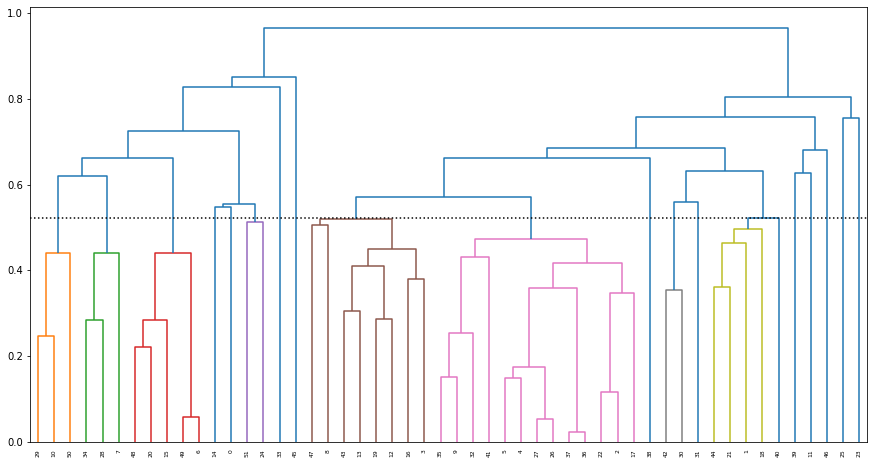

In [ ]:
import scipy.cluster.hierarchy as sch

def plot_dendrogram(X, linkage, metric, th):
    dendrogram = sch.dendrogram(
        sch.linkage(X, method=linkage, metric=metric, optimal_ordering=False), 
        color_threshold=th,
        distance_sort='descending',
    )
    plt.axhline(th, color='k', linestyle=':')
    return dendrogram
    
    
plt.figure(figsize=(15,8))
plot_dendrogram(X, agg.linkage, 'correlation', agg.distances_[-agg.n_clusters_+1]);

## Complete Linkage

> Considera a maior distância possível para que uma ação faça parte do mesmo grupo de outra. Assim, podemos minimizar as chances de "Coincidência", onde duas ações podem variar de maneira parecida, mas não estarem relacioanadas.

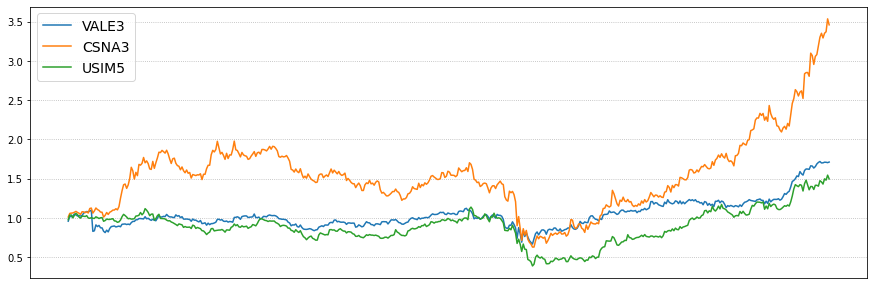

In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
plt.plot((1+X.loc['VALE3',:]).cumprod(), label='VALE3')
plt.plot((1+X.loc['CSNA3',:]).cumprod(), label='CSNA3')
plt.plot((1+X.loc['USIM5',:]).cumprod(), label='USIM5')
plt.grid(linestyle=':')
plt.legend(fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45);

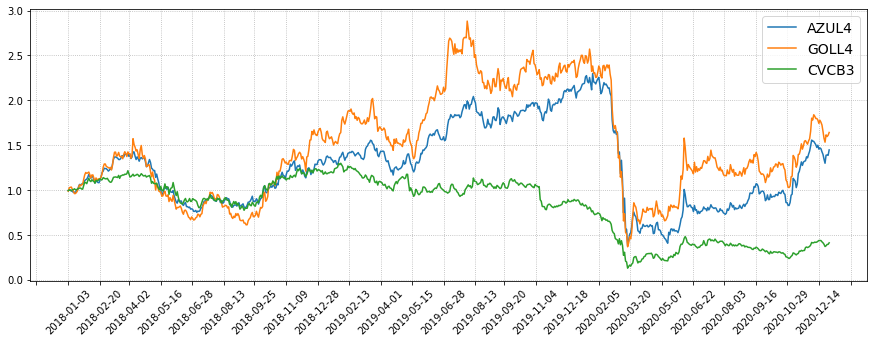

In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
plt.plot((1+X.loc['AZUL4',:]).cumprod(), label='AZUL4')
plt.plot((1+X.loc['GOLL4',:]).cumprod(), label='GOLL4')
plt.plot((1+X.loc['CVCB3',:]).cumprod(), label='CVCB3')
plt.grid(linestyle=':')
plt.legend(fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45);

Podemos observar pelo gráfico que empresas de turismo e companhia aéreas tem alguma relação. Apresentando variações no tempo às vezes semelhantes. Se olharmos apenas para o setor de transporte aéreo fica ainda mais parecido. GOLxAZUL

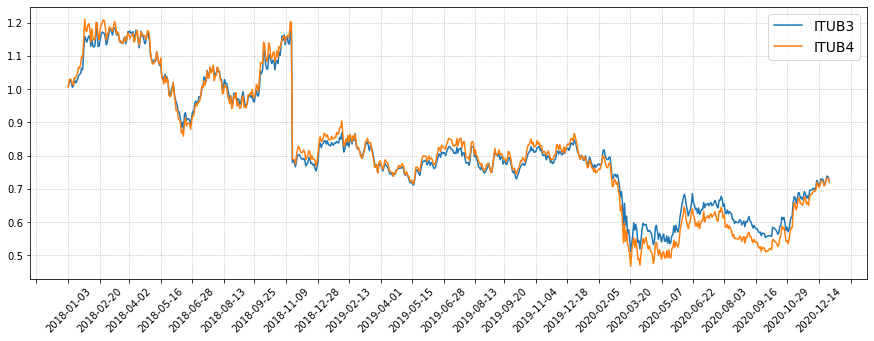

In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
plt.plot((1+X.loc['ITUB3',:]).cumprod(), label='ITUB3')
plt.plot((1+X.loc['ITUB4',:]).cumprod(), label='ITUB4')
plt.grid(linestyle=':')
plt.legend(fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45);

Ações preferenciais x ordinária podem apresentar preços um pouco diferentes, mas tendem a se comportar no mercado de maneira quase sobreposta. 